In [1]:
import pandas as pd

data = pd.read_csv('./dataSet/ONLINE EDUCATION SYSTEM REVIEW.csv')
data.head(5)

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,...,Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education
0,Male,Urban,Under Graduate,18,11,Laptop,Middle Class,4,5,No,...,1,No,No,No,91-100,1,1,Practical,6,Average
1,Male,Urban,Under Graduate,19,7,Laptop,Middle Class,4,1,Yes,...,1,Yes,Yes,No,91-100,1,1,Theory,3,Bad
2,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,5,2,No,...,1,No,Yes,No,71-80,1,1,Both,6,Bad
3,Male,Urban,Under Graduate,18,5,Laptop,Middle Class,4,4,Yes,...,2,No,No,yes,91-100,1,2,Theory,4,Bad
4,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,4,3,No,...,2,Yes,Yes,yes,81-90,3,3,Both,6,Average


In [2]:
for each in data.columns:
    if data[each].dtype == 'object':
        print(pd.unique(data[each]))

['Male' 'Female']
['Urban' 'Rural']
['Under Graduate' 'Post Graduate' 'School']
['Laptop' 'Desktop' 'Mobile']
['Middle Class' 'Poor' 'Rich']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'yes']
['91-100' '71-80' '81-90' '61-70' '31-40' '41-50' '21-30' '11-20' '51-60'
 '0-10']
['Practical' 'Theory' 'Both']
['Average' 'Bad' 'Good']


In [3]:
from sklearn.preprocessing import OrdinalEncoder
# from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('./dataSet/ONLINE EDUCATION SYSTEM REVIEW.csv')
data.head(5)

# Encoder doesn't touch numerical value, so it works fine for us
encoder = OrdinalEncoder()
# y_encorder = LabelEncoder()

for col_name in data.columns:
    if data[col_name].dtype == 'object' and col_name != 'Your level of satisfaction in Online Education':
        print(f'Encoding of {col_name}:\n')
        transformed = encoder.fit_transform(data[col_name].to_numpy().reshape(-1, 1))
        transformed_df = pd.DataFrame(transformed)
        data[col_name] = transformed_df.values
        print(f'{encoder.categories_}')

# coded_target = y_encorder.fit_transform(data['Your level of satisfaction in Online Education'])

# print(f'List of Target encoding:\n{y_encorder.classes_}')
data.head(25)

Encoding of Gender:

[array(['Female', 'Male'], dtype=object)]
Encoding of Home Location:

[array(['Rural', 'Urban'], dtype=object)]
Encoding of Level of Education:

[array(['Post Graduate', 'School', 'Under Graduate'], dtype=object)]
Encoding of Device type used to attend classes:

[array(['Desktop', 'Laptop', 'Mobile'], dtype=object)]
Encoding of Economic status:

[array(['Middle Class', 'Poor', 'Rich'], dtype=object)]
Encoding of Are you involved in any sports?:

[array(['No', 'Yes'], dtype=object)]
Encoding of Do elderly people monitor you?:

[array(['No', 'Yes'], dtype=object)]
Encoding of Interested in Gaming?:

[array(['No', 'Yes'], dtype=object)]
Encoding of Have separate room for studying?:

[array(['No', 'Yes'], dtype=object)]
Encoding of Engaged in group studies?:

[array(['No', 'yes'], dtype=object)]
Encoding of Average marks scored before pandemic in traditional classroom:

[array(['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70',
       '71-80', '81-90', '91-1

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,...,Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education
0,1.0,1.0,2.0,18,11,1.0,0.0,4,5,0.0,...,1,0.0,0.0,0.0,9.0,1,1,1.0,6,Average
1,1.0,1.0,2.0,19,7,1.0,0.0,4,1,1.0,...,1,1.0,1.0,0.0,9.0,1,1,2.0,3,Bad
2,1.0,0.0,2.0,18,5,1.0,0.0,5,2,0.0,...,1,0.0,1.0,0.0,7.0,1,1,0.0,6,Bad
3,1.0,1.0,2.0,18,5,1.0,0.0,4,4,1.0,...,2,0.0,0.0,1.0,9.0,1,2,2.0,4,Bad
4,1.0,0.0,2.0,18,5,1.0,0.0,4,3,0.0,...,2,1.0,1.0,1.0,8.0,3,3,0.0,6,Average
5,1.0,1.0,2.0,18,5,1.0,0.0,4,4,1.0,...,2,0.0,0.0,1.0,9.0,1,1,2.0,2,Bad
6,1.0,1.0,2.0,19,5,1.0,0.0,5,5,0.0,...,3,1.0,1.0,1.0,8.0,4,3,0.0,6,Average
7,1.0,1.0,2.0,17,4,1.0,0.0,4,4,1.0,...,6,0.0,1.0,0.0,6.0,3,3,1.0,6,Average
8,0.0,1.0,2.0,19,5,1.0,0.0,4,4,0.0,...,2,0.0,1.0,1.0,8.0,4,1,0.0,9,Bad
9,0.0,0.0,2.0,20,9,1.0,0.0,4,3,0.0,...,2,0.0,0.0,0.0,8.0,3,2,2.0,6,Average


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale the whole data
for col_name in data.columns:
    if (data.dtypes[col_name] != 'object' or col_name != 'Your level of satisfaction in Online Education'):
        data[col_name] = scaler.fit_transform(data[col_name].to_numpy().reshape(-1, 1))
    
data.head(25)

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,...,Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education
0,0.826081,0.722049,0.486024,-0.562497,1.411598,-0.581565,-0.270233,-0.334392,1.378125,-0.747040,...,-0.880700,-1.088087,-1.196072,-0.822769,1.244915,-1.747111,-1.576433,0.128714,-0.362683,Average
1,0.826081,0.722049,0.486024,-0.249763,-0.012407,-0.581565,-0.270233,-0.334392,-2.522158,1.338616,...,-0.880700,0.919045,0.836070,-0.822769,1.244915,-1.747111,-1.576433,1.458326,-1.925901,Bad
2,0.826081,-1.384947,0.486024,-0.562497,-0.724409,-0.581565,-0.270233,0.474571,-1.547087,-0.747040,...,-0.880700,-1.088087,0.836070,-0.822769,-0.165943,-1.747111,-1.576433,-1.200899,-0.362683,Bad
3,0.826081,0.722049,0.486024,-0.562497,-0.724409,-0.581565,-0.270233,-0.334392,0.403054,1.338616,...,-0.342697,-1.088087,-1.196072,1.215409,1.244915,-1.747111,-0.716636,1.458326,-1.404828,Bad
4,0.826081,-1.384947,0.486024,-0.562497,-0.724409,-0.581565,-0.270233,-0.334392,-0.572016,-0.747040,...,-0.342697,0.919045,0.836070,1.215409,0.539486,0.063085,0.143161,-1.200899,-0.362683,Average
5,0.826081,0.722049,0.486024,-0.562497,-0.724409,-0.581565,-0.270233,-0.334392,0.403054,1.338616,...,-0.342697,-1.088087,-1.196072,1.215409,1.244915,-1.747111,-1.576433,1.458326,-2.446973,Bad
6,0.826081,0.722049,0.486024,-0.249763,-0.724409,-0.581565,-0.270233,0.474571,1.378125,-0.747040,...,0.195306,0.919045,0.836070,1.215409,0.539486,0.968184,0.143161,-1.200899,-0.362683,Average
7,0.826081,0.722049,0.486024,-0.875230,-1.080410,-0.581565,-0.270233,-0.334392,0.403054,1.338616,...,1.809316,-1.088087,0.836070,-0.822769,-0.871373,0.063085,0.143161,0.128714,-0.362683,Average
8,-1.210535,0.722049,0.486024,-0.249763,-0.724409,-0.581565,-0.270233,-0.334392,0.403054,-0.747040,...,-0.342697,-1.088087,0.836070,1.215409,0.539486,0.968184,-1.576433,-1.200899,1.200535,Bad
9,-1.210535,-1.384947,0.486024,0.062971,0.699596,-0.581565,-0.270233,-0.334392,-0.572016,-0.747040,...,-0.342697,-1.088087,-1.196072,-0.822769,0.539486,0.063085,-0.716636,1.458326,-0.362683,Average


In [5]:
data['Your level of satisfaction in Online Education'].value_counts()

Average    541
Good       251
Bad        241
Name: Your level of satisfaction in Online Education, dtype: int64

In [6]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# ! Can only use encoded x data. Y data will need to be in normal form

X_train, X_test, y_train, y_test = train_test_split(data.drop('Your level of satisfaction in Online Education', axis=1), data['Your level of satisfaction in Online Education'])
smote = SMOTE()

os_X_train, os_Y_train = smote.fit_resample(X_train, y_train)
os_Y_train.value_counts()

Average    403
Good       403
Bad        403
Name: Your level of satisfaction in Online Education, dtype: int64

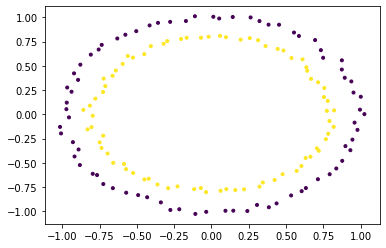

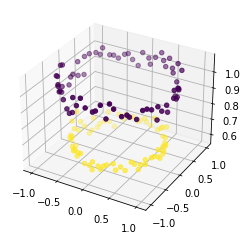

Prediction time:
0.39394402503967285 seconds


C:\Users\casim\AppData\Local\Temp\ipykernel_19152\1991279034.py:58: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes1 = fig.gca(projection = '3d')


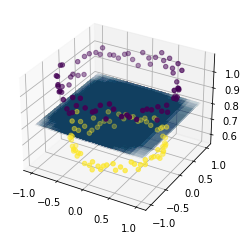

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D
  
# generating a toy dataset 
# make_circles Makes a large circle containing a smaller circle in 2d.
# X and Y are 2 features

X, Y = make_circles(n_samples = 150, noise = 0.02)
    
# visualizing data
plt.scatter(X[:, 0], X[:, 1], c = Y, marker = '.')
plt.show()


import time
start = time.time()

# adding a new dimension to X
# reshape Gives a new shape to an array without changing its data.
X1 = X[:, 0].reshape((-1, 1))
X2 = X[:, 1].reshape((-1, 1))
# X3 is the non-linear combination of the original features:
X3 = (X1**2 + X2**2)
# The hstack() function is used to stack arrays in sequence horizontally (column wise).
X = np.hstack((X, X3))

# visualizing data in higher dimension
fig = plt.figure()
axes = fig.add_subplot(111, projection = '3d')
axes.scatter(X1, X2, X1**2 + X2**2, c = Y, depthshade = True)
plt.show()


# Now, we use SVM to learn a 2-dimensional separating hyperplane.
# create support vector classifier using a linear kernel
from sklearn import svm
  
svc = svm.SVC(kernel = 'linear')
svc.fit(X, Y)
w = svc.coef_
b = svc.intercept_
  
# plotting the separating hyperplane
x1 = X[:, 0].reshape((-1, 1))
x2 = X[:, 1].reshape((-1, 1))
x1, x2 = np.meshgrid(x1, x2)
x3 = -(w[0][0]*x1 + w[0][1]*x2 + b) / w[0][2]

print('Prediction time:')
end = time.time()
print(end - start, "seconds")

fig = plt.figure()
axes2 = fig.add_subplot(111, projection = '3d')
axes2.scatter(X1, X2, X3, c = Y, depthshade = True)
axes1 = fig.gca(projection = '3d')
axes1.plot_surface(x1, x2, x3, alpha = 0.01)
plt.show()

In [8]:
# Example – SVM Model with RBF Kernel (Kernel Trick)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
 
# Load the IRIS dataset
 
iris = datasets.load_iris();
X = iris.data
y = iris.target
 
# Create training/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3, stratify=y)

print("Unscaled features:")
print(X_train[0:1])

# Feature scaling
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print("\nScaled features:")
print(X_train_std[0:1])

import time
start = time.time()

# Fit the model with RBF kernel
# C: Regularization parameter
# gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
# kernel: kernel type to be used in the algorithm such as Radial Basis Function (RBF).
svc = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svc.fit(X_train_std, y_train)
y_pred = svc.predict(X_test_std)

end = time.time()

print('\nPrediction time:')
print(end - start, "seconds")


 
# Evaluating the performance
print('\nAccuracy: %.3f' % accuracy_score(y_test, y_pred))

Unscaled features:
[[5.5 4.2 1.4 0.2]]

Scaled features:
[[-0.4301064   2.63118533 -1.33269725 -1.30728421]]

Prediction time:
0.0029938220977783203 seconds

Accuracy: 0.978
